## About data

Data provides an information about Titanic's passengers.

Columns:

* pclass- ticket's class
* survived - catastrophe survivor
* name - name and surname
* sex - passenger's gender
* age - passenger's age
* sibsp - number of siblings or spouses on a board
* parch - number of parents or kids on a board
* ticket - ticket's number
* fare - ticket's price
* cabin - cabin number
* embarked - the port, where the passenger boarded (C - Cherbourg, Q - Queenstown, S - Southampton)
* boat - lifeboat number
* body - body number (if passenger not survived and the body has been found)
* home.dest - destination

In [3]:
import pandas as pd

# 1. Getting familiar with the total number of records

In [6]:
df = pd.read_csv('titanic.csv', sep=",")
len(df)

1310

# 2. Getting familiar with a few random records

In [9]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
567,2.0,0.0,"Stokes, Mr. Philip Joseph",male,25.0,0.0,0.0,F.C.C. 13540,10.5000,NaN,S,NaN,81.0,"Catford, Kent / Detroit, MI"
682,3.0,0.0,"Bourke, Miss. Mary",female,NaN,0.0,2.0,364848,7.7500,NaN,Q,NaN,NaN,"Ireland Chicago, IL"
859,3.0,0.0,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0.0,0.0,365226,6.7500,NaN,Q,NaN,NaN,NaN
792,3.0,0.0,"Elias, Mr. Tannous",male,15.0,1.0,1.0,2695,7.2292,NaN,C,NaN,NaN,Syria
1237,3.0,0.0,"Svensson, Mr. Olof",male,24.0,0.0,0.0,350035,7.7958,NaN,S,NaN,NaN,NaN
922,3.0,1.0,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0.0,0.0,9234,7.7500,NaN,Q,16,NaN,NaN
27,1.0,1.0,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1.0,0.0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI"
57,1.0,1.0,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1.0,2.0,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
863,3.0,0.0,"Hendekovic, Mr. Ignjac",male,28.0,0.0,0.0,349243,7.8958,NaN,S,NaN,306.0,NaN
1039,3.0,1.0,"Mullens, Miss. Katherine ""Katie""",female,NaN,0.0,0.0,35852,7.7333,NaN,Q,16,NaN,NaN


# 3. Checking the number of missing values in each column

In [12]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

# 4. Calculating the number of recovered bodies

In [15]:
len(df[(df['survived'] == 0.0)]) - len(df[(df['body'].isnull()) & (df['survived'] == 0.0)])

121

# 5. Correlation analysis between columns and the number of unique values in each column

In [18]:
df.corr(numeric_only = True)

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [20]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

# 6. Visualization of the overall percentage distribution of victims and survivors

<Axes: title={'center': 'Percent distribution of victims and survivors'}>

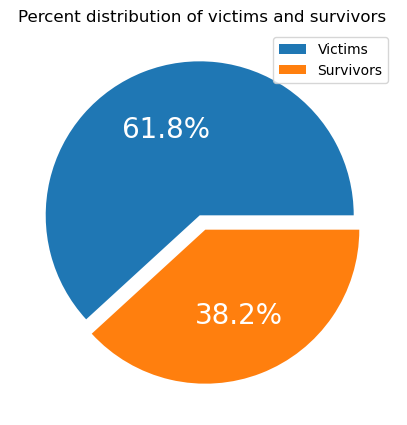

In [66]:
df['survived'].value_counts().plot(
    kind = 'pie',
    autopct = '%.1f%%',
    figsize = (5, 5),
    fontsize = 20,
    title = 'Percentage distribution of victims and survivors',
    textprops = {'color' : 'white'},
    ylabel = '',
    legend = True,
    labels = ['Victims', 'Survivors'],
    explode = [0.05, 0.05]
)

# 7. Classification by age

In [25]:
def kid_or_adult(age):
    if age >= 18.0:
        return 'adult'
    else:
        return 'kid'

df['kid_or_adult'] = df['age'].apply(kid_or_adult)

# 8. Creating a table of survivors

In [27]:
survivors = df.query("survived == 1.0")
survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,kid_or_adult
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",kid
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",adult
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


# 9. Visualizations for survivors

<Axes: title={'center': 'Comaprision of amount of surviving females and males'}, ylabel='Number of people'>

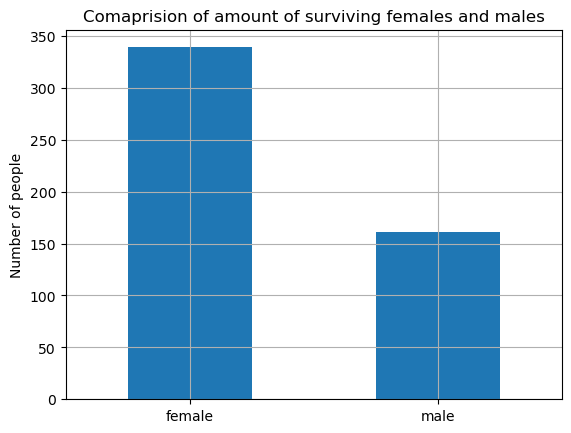

In [80]:
survivos_by_sex = survivors.pivot_table(index = 'sex', values = 'survived', aggfunc = 'count')
survivos_by_sex.plot(
    kind = 'bar',
    rot = 0,
    xlabel = '',
    grid = True,
    title = 'Comaprision of amount of surviving females and males',
    legend = False,
    ylabel = 'Number of people'
)

In [70]:
survivors_by_sex_and_age = survivors.pivot_table(index = ['sex', 'kid_or_adult'], values = 'survived', aggfunc = 'count')
females_and_kids = survivors_by_sex_and_age.loc['female'].sum() + survivors_by_sex_and_age.loc[('male', 'kid')]
males_adults = survivors_by_sex_and_age.loc[('male', 'adult')]
females_and_kids.index = ['females and kids']
males_adults.index = ['males']
females_and_kids_plus_males = pd.concat([females_and_kids, males_adults])
females_and_kids_plus_males = females_and_kids_plus_males.to_frame().rename({0 : 'number_of_survivors'}, axis = 1)
females_and_kids_plus_males

,number_of_survivors
females and kids,396
males,104


<Axes: title={'center': 'Comparison of the number of surviving females with kids and adult males'}, ylabel='Number of people'>

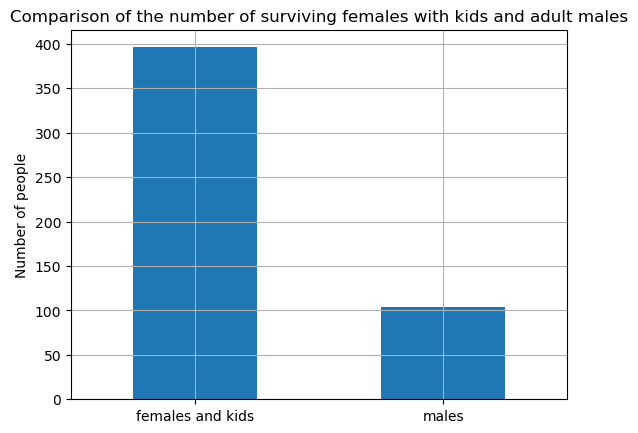

In [82]:
females_and_kids_plus_males.plot(
                            kind = 'bar',
                            rot = 0,
                            xlabel = '',
                            grid = True,
                            title = 'Comparison of the number of surviving females with kids and adult males',
                            legend = False,
                            ylabel = 'Number of people'
)

<Axes: title={'center': 'Number of survived males (according to age)'}, xlabel='Age ranges of surviving adult males', ylabel='Frequency'>

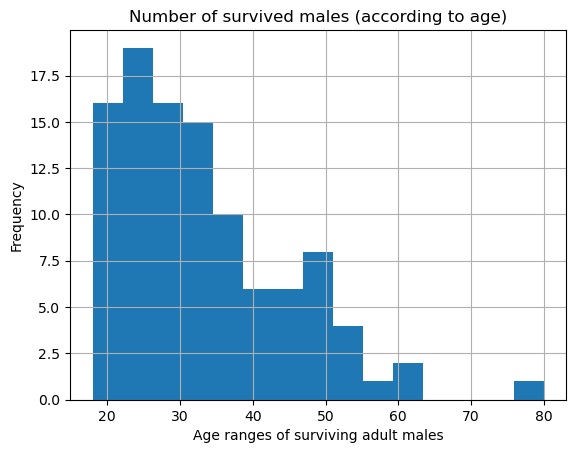

In [84]:
survivors.query("sex == 'male' and kid_or_adult == 'adult'")['age'].plot(kind = 'hist',
                                                                        bins = 15,
                                                                        grid = True,
                                                                        xlabel = 'Age ranges of surviving adult males',
                                                                        title = 'Number of survived males (according to age)')

# 10. Creating a table for victims

In [94]:
deaths = df.query("survived == 0.0")
deaths.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,kid_or_adult
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",kid
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",adult


# 11. Visualizations for victims

<Axes: title={'center': 'Comparison of the number of dying females and males'}, ylabel='Number of people'>

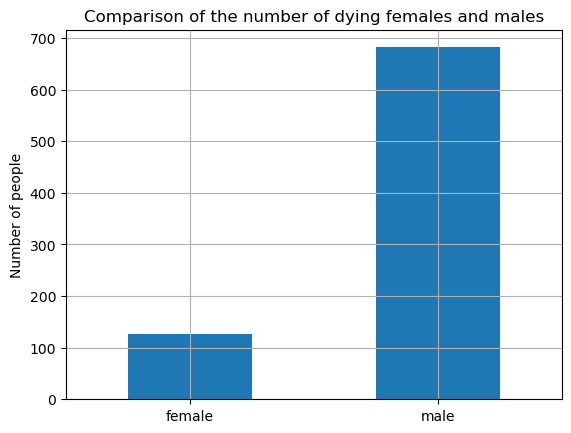

In [98]:
deaths_by_sex = deaths.pivot_table(index = 'sex', values = 'survived', aggfunc = 'count')
deaths_by_sex.plot(
    kind = 'bar',
    rot = 0,
    xlabel = '',
    grid = True,
    title = 'Comparison of the number of dying females and males',
    legend = False,
    ylabel = 'Number of people'
)

<Axes: title={'center': 'Number of dying adult males (according to age)'}, xlabel='Age ranges of dying adult males', ylabel='Frequency'>

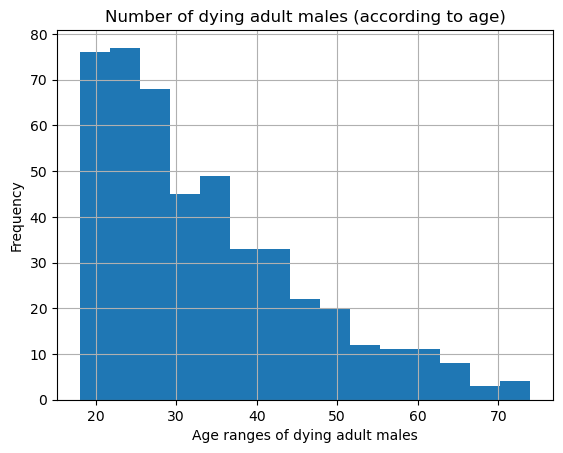

In [100]:
deaths.query("sex == 'male' and kid_or_adult == 'adult'")['age'].plot(kind = 'hist',
                                                                        bins = 15,
                                                                        grid = True,
                                                                        xlabel = 'Age ranges of dying adult males',
                                                                        title = 'Number of dying adult males (according to age)'
                                                                     )

<Axes: title={'center': 'Number of dying adult females (according to age)'}, xlabel='Age ranges of dying adult females', ylabel='Frequency'>

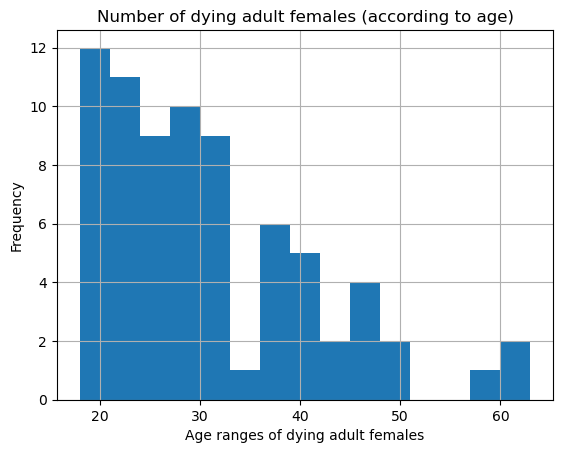

In [102]:
deaths.query("sex == 'female' and kid_or_adult == 'adult'")['age'].plot(kind = 'hist',
                                                                        bins = 15,
                                                                        grid = True,
                                                                        xlabel = 'Age ranges of dying adult females',
                                                                        title = 'Number of dying adult females (according to age)'
)

<Axes: title={'center': 'Number of dying kids (according to age)'}, xlabel='Age ranges of dying kids', ylabel='Frequency'>

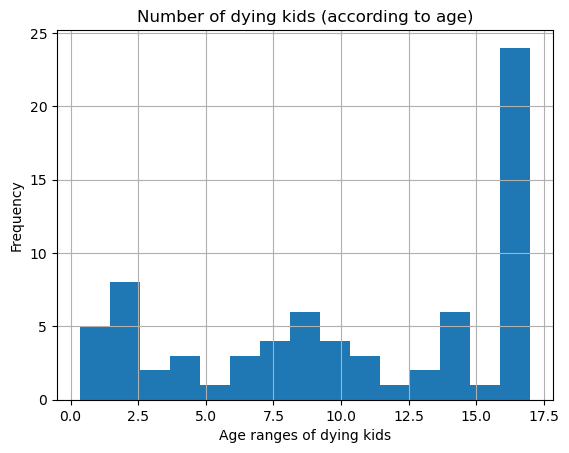

In [104]:
deaths.query("kid_or_adult == 'kid'")['age'].plot(kind = 'hist',
                                                 bins = 15,
                                                 grid = True,
                                                 xlabel = 'Age ranges of dying kids',
                                                 title = 'Number of dying kids (according to age)'
)

# 12. Getting familiar with the number of passengers in each class and visualizing the percentage distribution of survivors by class

In [47]:
df['pclass'].value_counts().to_frame()

,count
pclass,
3.0,709
1.0,323
2.0,277


<Axes: title={'center': 'Percentage distribution of survivors (according to clasess'}>

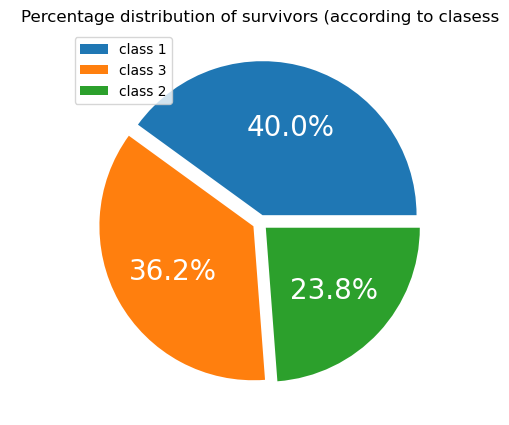

In [106]:
survivors['pclass'].value_counts().plot(
                                    kind = 'pie',
                                    autopct = '%.1f%%',
                                    figsize = (5, 5),
                                    fontsize = 20,
                                    title = 'Percentage distribution of survivors (according to clasess',
                                    textprops = {'color' : 'white'},
                                    ylabel = '',
                                    legend = True,
                                    explode = [0.05, 0.05, 0.05],
                                    labels = ['class 1', 'class 3', 'class 2']
)

# 13. Distribution of victims among lifeboat holders

<Axes: title={'center': 'Śmiertelność w zależności od posiadania łodzi ratunkowej'}, ylabel='Liczba osób'>

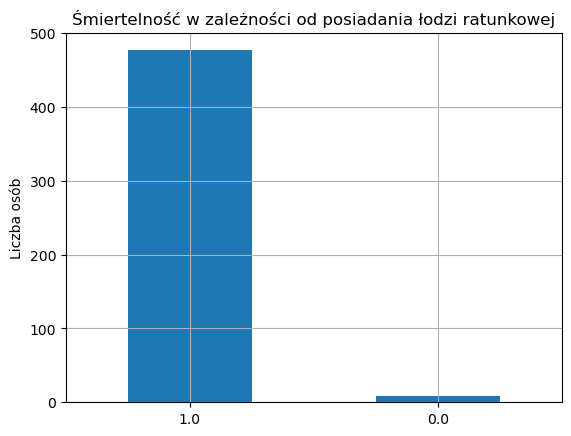

In [54]:
df[df['boat'].notnull()]['survived'].value_counts().plot(
                                                    kind = 'bar',
                                                    rot = 0,
                                                    xlabel = '',
                                                    grid = True,
                                                    title = 'Victims according to lifeboat ac',
                                                    legend = False,
                                                    ylabel = 'Liczba osób'
)

# 14. Outlier analysis

<Axes: >

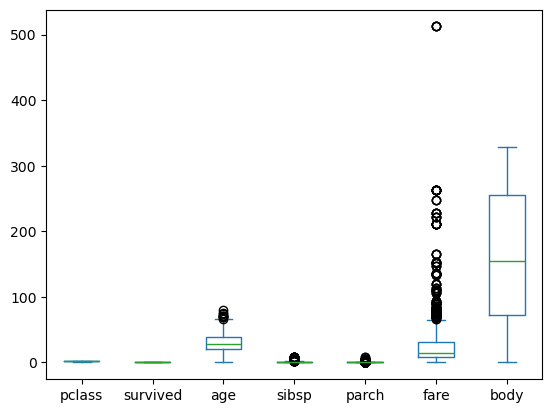

In [59]:
df.plot(kind ='box')

In [62]:
outliers_df = df[['age', 'sibsp', 'parch', 'fare']].max().round(2).to_frame().rename({0 : 'max'}, axis = 1)
outliers_df

,max
age,80.00
sibsp,8.00
parch,9.00
fare,512.33


# 15. Conclusions and observations:

1. 121 bodies were recovered.
2. There are no clear correlations between the columns. This is due to the nature of the analyzed data.
3. The majority of passengers died in the disaster.
4. Among the survivors, women and children are significantly overrepresented.
5. The largest number of surviving adult men appear in the age range of approximately 18–35 years.
6. Significantly more men did not survive the catastrophe.
7. Most female and male victims fall within a similar age range.
8. The highest number of child victims were close to reaching adulthood.
9. The fewest victims were in the second class. However, it should be noted that this was the least numerous passenger class.
10. Among the victims were people who had access to a lifeboat.
11. Outliers appear in the columns related to age, number of siblings/spouses/children, and ticket prices. Analyzing the maximum values in these columns does not allow for clear conclusions. For the first three columns, the values may reflect entire families or elderly people traveling on the ship. The only suspicious data appears in the ticket price column. Some records show prices significantly higher than others, but these may have been special tickets with limited availability. Tickets with a price of 0 may have been distributed by the event organizer.

